# A selection of location for oil wells

A project оf choosing locations for drilling of new wells for a mining company

**Purpose of the study:**

We are provided by oil samples in three regions: in each region there are 10,000 fields where the quality of oil and the volume of its stocks was measured. Create a machine learning model that will help to determine the area where mining will bring the greatest profit. Analyze the possible profits and risks using *bootstrap technology.*

Steps to select location:

- Define the values of the features for each fields in a selected region;
- Create a model and estimate the volume of stocks;
- Select deposits with the highest estimates of values. The number of deposits depends on a company's budget and a cost of developing a single well;
- Profit is equal to the total profits of selected deposits.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Loading-and-preparation-of-data" data-toc-modified-id="1.-Loading-and-preparation-of-data-1">1. Loading and preparation of data</a></span><ul class="toc-item"><li><span><a href="#1.1-General-information-about-data" data-toc-modified-id="1.1-General-information-about-data-1.1">1.1 General information about data</a></span></li><li><span><a href="#1.2-Preprocessing-of-data" data-toc-modified-id="1.2-Preprocessing-of-data-1.2">1.2 Preprocessing of data</a></span></li></ul></li><li><span><a href="#2-Trainings-and-validations-of-models" data-toc-modified-id="2-Trainings-and-validations-of-models-2">2 Trainings and validations of models</a></span></li><li><span><a href="#3-Preparation-for-profit-calculation" data-toc-modified-id="3-Preparation-for-profit-calculation-3">3 Preparation for profit calculation</a></span></li><li><span><a href="#4-Calculation-of-profits-and-risks" data-toc-modified-id="4-Calculation-of-profits-and-risks-4">4 Calculation of profits and risks</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5">Conclusion</a></span></li></ul></div>

## 1. Loading and preparation of data

### 1.1 General information about data

Impose the library we need.
Consider general information about data.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import random
from IPython.display import display

# Plots
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

# Metrics
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")

# Download data about three wells
reg_1 = pd.read_csv('C:/datasets/geo_data_0.csv')
reg_2 = pd.read_csv('C:/datasets/geo_data_1.csv')
reg_3 = pd.read_csv('C:/datasets/geo_data_2.csv')

# List of tables with info about regions
regs = [reg_1, reg_2, reg_3]

# Info About Tables
for i in range(len(regs)):
    print('Region №', i+1)
    regs[i].info()
    display(regs[i].head(2))

Region № 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.22117,105.280062
1,2acmU,1.334711,-0.340164,4.36508,73.037750


Region № 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261


Region № 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697


We have three tables with the same structure, consisting of 100,000 rows and 5 columns with the next information:

- id — Unique well identifier;
- f0, f1, f2 — Three features of points (features meaningful);
- product — stock volume in a well (thousand barrels).

This data have good quality, and do not have missed values.

Consider the distribution of the features:

In [2]:
for i in range(len(regs)):
    print('Region №', i+1)
    display(regs[i].describe())

Region № 1


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Region № 2


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Region № 3


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Consider the distribution of features on the chart. To do this, create a function that will build boxplots, frequency histograms and density histograms for selected columns and a certain size 'bins'

In [3]:
def density_plot(column, bins_size):
    
    # features:
    y1 = reg_1[column]
    y2 = reg_2[column]
    y3 = reg_3[column]

    group_labels = ['region_1', 'region_2', 'region_3']

    colors = ['#00bfff', '#ff7f00', '#90ff77']
    
    # Creates an object of combined plots
    fig = make_subplots(rows=2, cols=1, row_heights=[2., 1.])
    
    # Create boxplots
    fig.add_trace(go.Box(x=y1, showlegend=False, marker_color='#00bfff', name=group_labels[0]), row=2, col=1)
    fig.add_trace(go.Box(x=y2, showlegend=False, marker_color='#ff7f00', name=group_labels[1]), row=2, col=1)
    fig.add_trace(go.Box(x=y3, showlegend=False, marker_color='#90ff77', name=group_labels[2]), row=2, col=1)
    
    # Creates histograms of frequencies and histograms of densities
    hist_data = [y1, y2, y3]
    distplfig = ff.create_distplot(hist_data, group_labels, bin_size=bins_size, colors = colors, show_rug=False)
    for k in range(len(distplfig.data)):
        fig.add_trace(distplfig.data[k],
                      row=1, col=1)
        
    # name of the plot    
    fig.update_layout(title_text='Boxplots and Customized Distplot with feature '+column+' of regions')
    
    # The name of the X axis
    fig.update_layout(xaxis_title=column)
    fig.update_layout(yaxis_title='frequency density')
    
    fig.show()

Use the function for all features

In [4]:
features_list = ['f0', 'f1', 'f2', 'product']

#for i in features_list:
    #density_plot(i, 5)

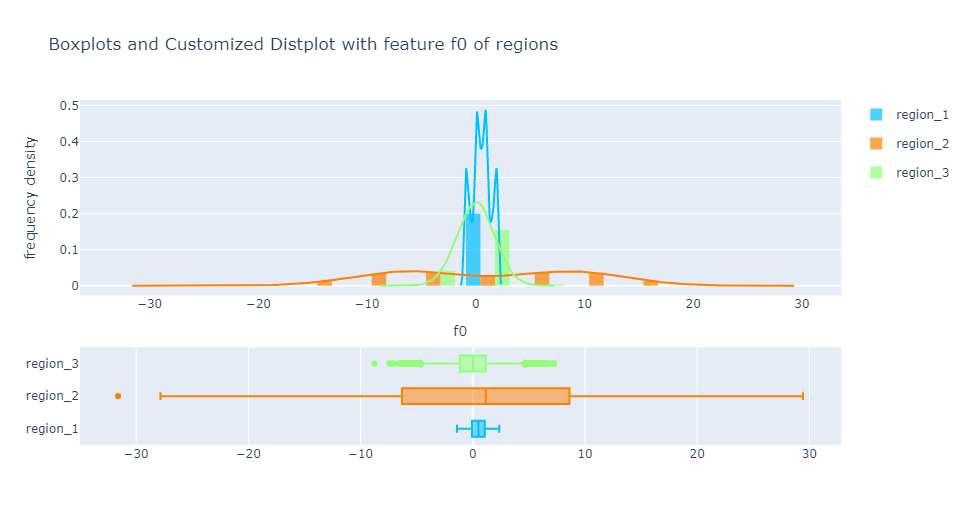

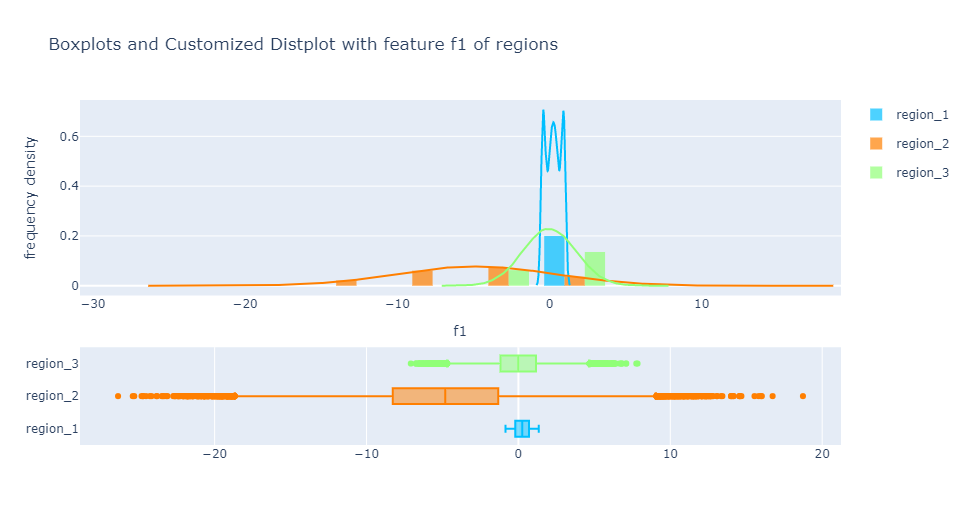

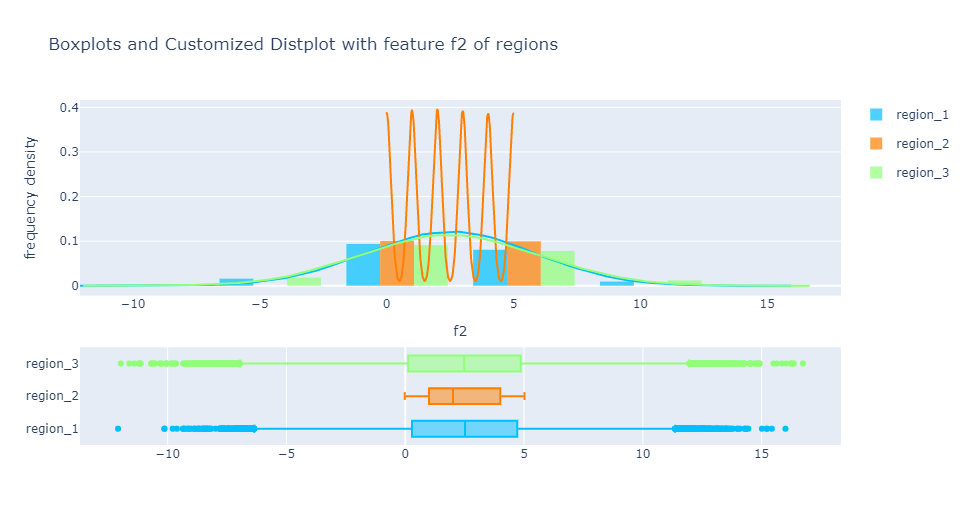

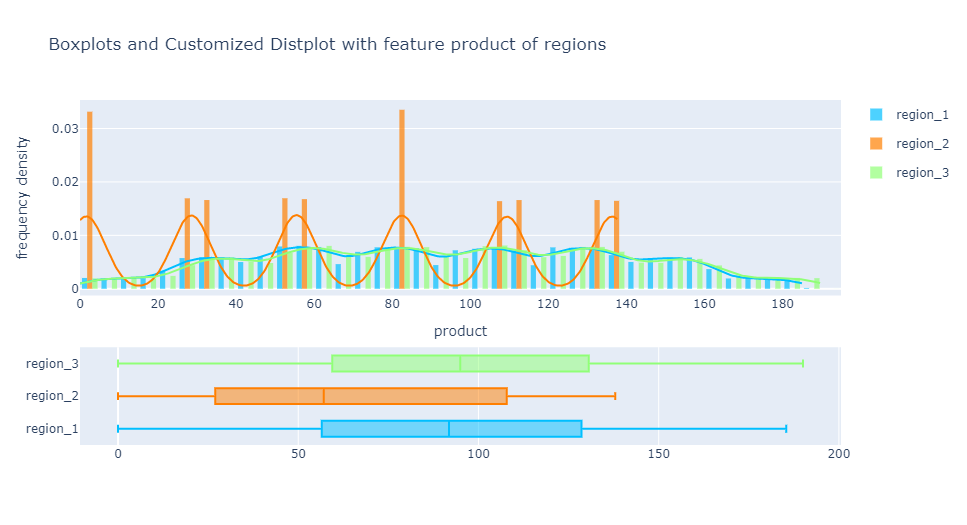

**product**

The distribution of oil reserves in the first and third region is very similar. The distribution of reserves in the second region is very different from other regions (and looks too unnatural). On average, oil volumes in the wells of this region are significantly less than in the rest. In general, the volume of reserves in the wells does not exceed 190 thousand barrels.

In [5]:
reg_2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

(The distribution of oil volumes in wells of the second region is limited of 12 values) 

**f0**

The distribution of the feature f0 in each regions has its own peculiar properties. The greatest scap is observed in the second region, in the same region there are minimal and maximum of features.

**f1**

The distribution of the f1 feature in each regions has its own characteristics. The greatest scap is observed in the second region, in the same region there are minimal and maximum signs.

**f2**

The distribution of the f2 feature in the second region is also significantly different from the distribution in other regions, but in this case the scope is smallest. The feature is equally distributed among several values. The distribution of f2 in the first and third regions is very similar. 

Consider the correlation matrix to identify possible close links between different features in separate regions.

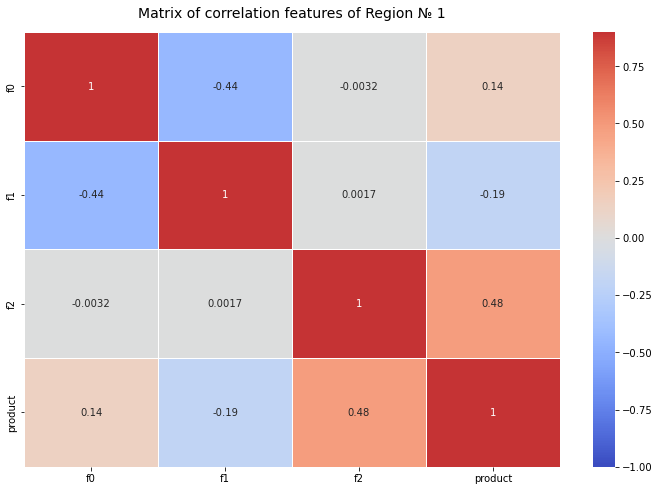

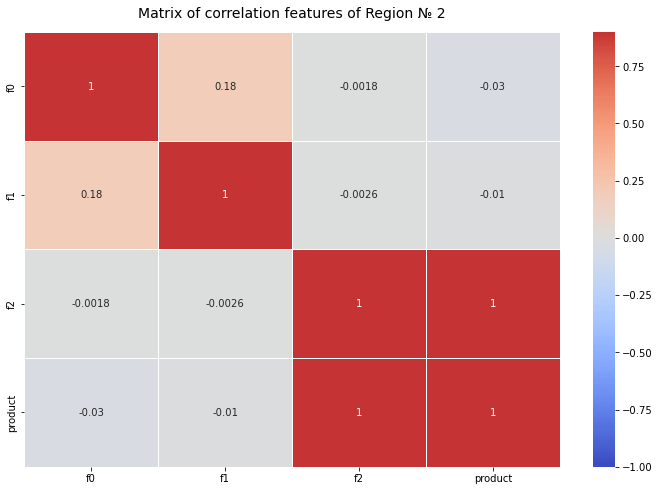

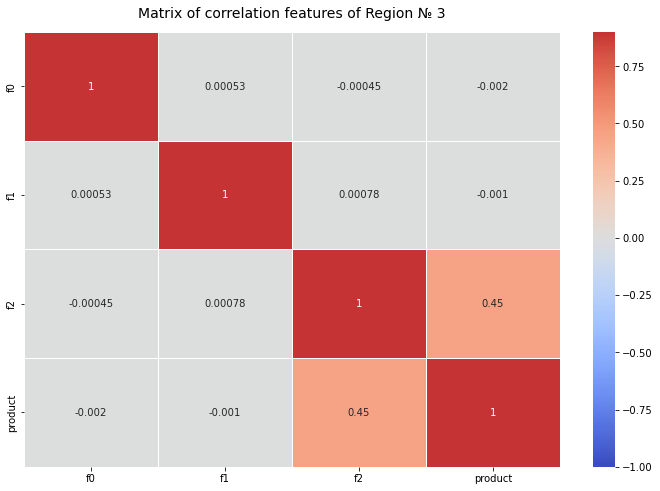

In [6]:
for i in range(len(regs)):
    corr = regs[i].corr()
    plt.figure(figsize = (12,8))
    heatmap = sns.heatmap(corr, cmap='coolwarm', linewidths=1, linecolor='white', vmin=-1, vmax=0.9, center= 0, annot=True)
    heatmap.set_title('Matrix of correlation features of Region № {}'.format(i+1), fontdict = {'fontsize': 14}, pad = 14)
    plt.show()

In the first region, a close feedback can be distinguished between the features f0 and f1 (Corr. -0.44) and the close direct linear relationship between the feature f2 and the volume of oil reserves in wells (Corr. 0.48), the relationship of stocks in wells and other features are expressed weaker: between f0 and Product (Corr. 0.14), f1 and Product (Corr. -0.19). In the second region, there is a direct functional relationship between the feature f2 and the volume of Product (Corr. 1). Also, a weak bond is present between the features f1 and f0 (Corr. 0.18). In the third region, we can emphasize a close connection between the feature f2 and the volume of oil in wells (Corr. 0.45), there is no relationship between other features. 

**Conclusion 1.1**

We have considered general information about data. The data have good quality, and do not have missed values.

We have analyzed the distribution of features.
The distribution of oil reserves in the first and third region is very similar. The distribution of reserves in the second region is very different from other regions (and looks too unnatural). On average, oil volumes in the wells of this region are significantly less than in the rest. In general, the volume of reserves in the wells does not exceed 190 thousand barrels.
The distribution of the feature f0 in all regions has its own characteristic features. The greatest scope is observed in the second region, in the same region the minimum and maximum sign value are noted. The distribution of the F1 feature in all regions has its own characteristics. The greatest scope is observed in the second region. There are the minimum and maximum value of feature in the same region.
The distribution of the f2 feature in the second region is also significantly different from the distribution in other regions, but in this case, scope is the smallest. The feature is equally distributed among several values. The distribution of f2 in the first and third regions is very similar.

Built the correlation matrix, revealed a different relationship between some features in some regions. (see paragraph above)

### 1.2 Preprocessing of data 

The distribution of features in the regions has its own peculiar properties, and the relationship between characteristics and volume of oil reserves in wells is different in all regions, so it is required to train three separate models for each region.

Highlight features and target features.

In [7]:
for i in range(1,4):
    exec('features_{a} = reg_{a}.drop(["id", "product"], axis=1)'.format(a=i))
    exec('target_{a} = reg_{a}["product"]'.format(a=i))

We divide the samples on training and validation samples.

In [8]:
for i in range(1,4):
    exec('features_train_{a}, features_valid_{a}, target_train_{a}, target_valid_{a} = \
train_test_split(features_{a}, target_{a}, test_size=0.25, random_state=12345)'.format(a=i))

**Conclusion 1.2**

Prepared data for models: selected features and target, divided them into training and validation samples.

**Conclusion 1**

Considered general information about data.

Analyzed the distribution of features. We revealed that the distribution of characteristics and the relationship with their target in the regions have its own peculiar properties, after which we decided to create separate models for each region.

Prepared data for models: selected features and target, divided them into training and validation samples.

## 2 Trainings and validations of models

Scalize the features of the learning and validation sample for regression models.

In [9]:
# Scaling the features

# List of features
numeric = ['f0', 'f1', 'f2']

# list of samples
scaler_list = [features_train_1, features_valid_1,
                       features_train_2, features_valid_2,
                       features_train_3, features_valid_3]

scaler = StandardScaler()

for i in range(0, len(scaler_list)-1, 2):
    scaler.fit(scaler_list[i][numeric])
    scaler_list[i][numeric] = scaler.transform(scaler_list[i][numeric])
    scaler_list[i+1][numeric] = scaler.transform(scaler_list[i+1][numeric])

We train the model in training samples. Linear regression was chosen as a model.

Make predictions on the validation sample.

In [10]:
model = LinearRegression()
for i in range(1,4):
    exec('model.fit(features_train_{a}, target_train_{a})'.format(a = i))
    exec('predicted_valid_{a} = model.predict(features_valid_{a})'.format(a = i))

Create new DataFrames for true and predicted 'Product' values in various regions

In [11]:
for i in range(1,4):
    exec('df_product_{a} = pd.DataFrame()'.format(a = i))
    exec('df_product_{a}["product_true"] = target_valid_{a}'.format(a = i))
    exec('df_product_{a}["product_predicted"] = predicted_valid_{a}'.format(a = i))
    exec('display(df_product_{a}.head(3))'.format(a = i))

,product_true,product_predicted
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640


,product_true,product_predicted
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760


,product_true,product_predicted
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809


In [12]:
product_list = [df_product_1, df_product_2, df_product_3]

Consider the distribution of predicted and true values of oil reserves in wells on plots

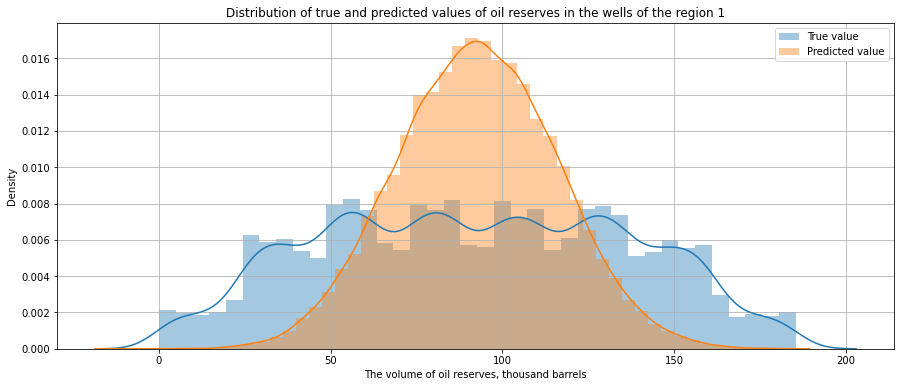

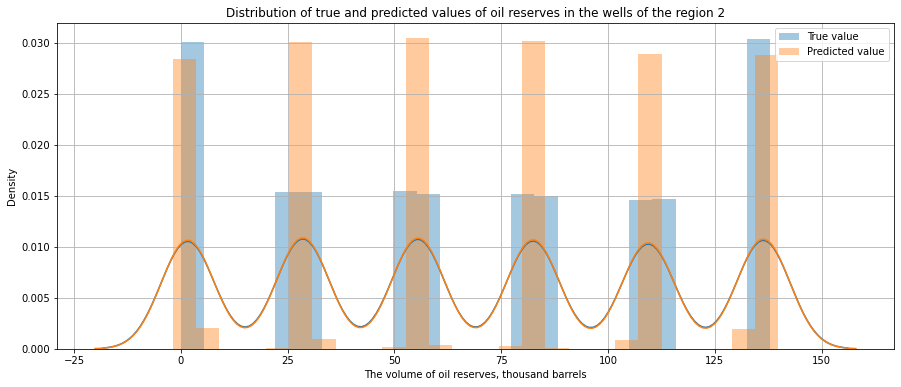

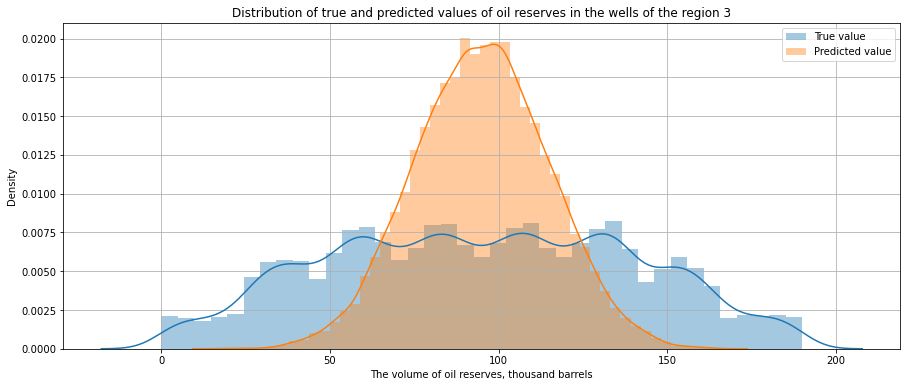

In [13]:
N_reg = 0
for i in product_list:
    N_reg +=1
    fig = plt.subplots(figsize = (15,6))
    g1 = sns.distplot(i['product_true'], label = 'True value', ax = plt.subplot())
    g2 = sns.distplot(i['product_predicted'], label = 'Predicted value', ax = plt.subplot())
    plt.grid()
    g1.legend(loc="upper right")
    plt.title("Distribution of true and predicted values of oil reserves in the wells of the region "+str(N_reg))
    plt.ylabel("Density")
    plt.xlabel("The volume of oil reserves, thousand barrels")
    plt.show()

On the plots, we see that the distribution of true and predicted values of the Product have discrepancies.

Mean stock of predicted Products and RMSE models:

In [14]:
N_reg = 0
for i in product_list:
    N_reg += 1
    print("Region", N_reg)
    print('Mean stock of predicted Products:{:.3f} thousand barrels'.format(i['product_predicted'].mean()))
    print('RMSE of model: {:.3f}, thousand barrels'.format(np.sqrt(mean_squared_error(i['product_true'], i['product_predicted']))))
    print('')

Region 1
Mean stock of predicted Products:92.593 thousand barrels
RMSE of model: 37.579, thousand barrels

Region 2
Mean stock of predicted Products:68.729 thousand barrels
RMSE of model: 0.893, thousand barrels

Region 3
Mean stock of predicted Products:94.965 thousand barrels
RMSE of model: 40.030, thousand barrels



**Conclusion 2**

We have trained regression models for individual regions

We've made the predictions of 'Product' on the validation sample, the results were maintained in new DataFrames corresponding to individual regions.
We've calculated the mean stock of predicted raw materials and RMSE models

According to the predictions of the models, the greatest possible reserves of raw materials are in the first and third regions, but in these regions a root-mean-square deviation reaches very large values: with the mean reserve of raw materials about 90-95 thousand barrels, the mean deviation from true values can reach 37- 40 thousand barrels. The use of similar models in practice is possible, but it makes sense to refer to the search for other features capable of clarifying the model.

The model for the second region makes very accurate predictions, due to the close connection of one of the fearures with the target feature. RMSE models less than 1 thousand barrels.

## 3 Preparation for profit calculation

Save key values for calculations in individual variables.

- n_points - Number of points for development
- budget - Budget for well development in the region (10 billion rubles)
- unit_income - Income from each product unit is 450 thousand rubles (the volume is indicated in thousands of barrels)

In [15]:
n_points = 200
budget = 10000000
unit_income = 450

Calculate sufficient volume of raw materials `'V_product'` For the break-even development of a new well (in thousands of barrels).

In [16]:
V_product = budget/n_points/unit_income
print(V_product)

111.11111111111111


**Conclusion 3**

The calculated amount of raw materials for the break-even development of a new well is 111.1 thousand barrels, this value exceeds the mean reserves of predicted raw materials in all wells. Therefore, it is important when searching for the best wells for development, take into account the risks of losses.

## 4 Calculation of profits and risks

Write a function for calculating profits on selected wells and predictions of the model

In [17]:
def profit(df, target, probabilities, n_points):
    '''df - df with info about wells,
    target - target value of the volume of raw materials,
    probabilities - column with information about the stock of raw materials in wells predicted by the model,
    n_point - number of best points.
    Returns the profit value in a million rubles.'''
    df_sorted = df.nlargest(n_points, probabilities)
    income = (450/1000) * df_sorted[target].sum()
    return income - budget/1000

Calculate profit on the best wells in separate regions

In [18]:
state = np.random.RandomState(12345)

for i in range(1,4):
    exec('profit_reg_{a} = []'.format(a=i))
    for k in range(1000):
        exec('df_subsample = df_product_{a}.sample(n = 500, replace = True, random_state = state)'.format(a=i))
        exec('profit_reg_{a}.append(profit(df_subsample, "product_true", "product_predicted", 200))'.format(a=i))
                  
    exec('profit_reg_{a} = pd.Series(profit_reg_{a})'.format(a=i))

Histogram distribution of mean profits in different regions:

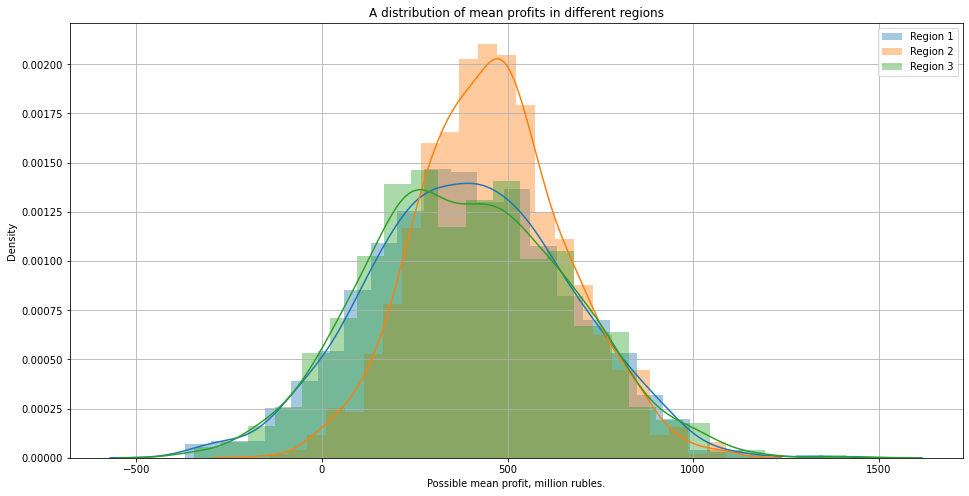

In [19]:
fig = plt.subplots(figsize = (16,8))
#sns.set_palette("gist_rainbow")
g1 = sns.distplot(profit_reg_1, label = 'Region 1', ax = plt.subplot())
g2 = sns.distplot(profit_reg_2, label = 'Region 2', ax = plt.subplot())
g3 = sns.distplot(profit_reg_3, label = 'Region 3', ax = plt.subplot())
plt.grid()
g1.legend(loc="upper right")
plt.title("A distribution of mean profits in different regions")
plt.ylabel("Density")
plt.xlabel("Possible mean profit, million rubles.")
plt.show()

Find a mean profit, 95% confidence interval and loss risk for each region.

In [20]:
profit_list = [profit_reg_1, profit_reg_2, profit_reg_3]

N_reg = 0
for i in profit_list:
    N_reg += 1
    print("Region №", N_reg)
    
    # Mean profit
    print('Mean profit: {:.2f} million rubles'.format(i.mean()))
    
    # 95%й confidence interval
    lower = i.quantile(0.025)
    upper = i.quantile(0.975)
    print('95%-й confidence interval: from {:.2f} млн.руб. before {:.2f} million rubles.'.format(lower, upper))
    
    # risk per percent.
    risk = st.percentileofscore(i, 0)
    print('Risk:', risk, '%')
    print('')

Region № 1
Mean profit: 396.16 million rubles
95%-й confidence interval: from -111.22 млн.руб. before 909.77 million rubles.
Risk: 6.9 %

Region № 2
Mean profit: 461.16 million rubles
95%-й confidence interval: from 78.05 млн.руб. before 862.95 million rubles.
Risk: 0.7 %

Region № 3
Mean profit: 392.95 million rubles
95%-й confidence interval: from -112.23 млн.руб. before 934.56 million rubles.
Risk: 6.5 %



**Conclusion 4** In the first and third regions, the possible profit and the risk of losses have close values. The average possible profit from the development in these regions by 70 million rubles is less than in the second region, while the risk of a loss is 6.5-6.9%.

## Conclusion

In accordance with the purpose of the project, we built a machine learning model, which provides information according to which the region can be recommended, where oil production will bring the greatest earlier. And also analyzed the possible profit and risks of Bootstrap technique.

When analyzing the distribution of features, we revealed that their distribution and connection with the target feature in the regions have their own characteristics, after which we decided to create separate models of machine learning for each region.

Linear regression was chosen as a model by recommendations for this type of tasks.
Features had a different range of values, so before constructing a linear regression model, it was decided to produce their scaling.

According to the simulation of the models, the greatest possible reserves of raw materials are in the first and third regions, but in these regions the 
root-mean-square deviation reaches reaches very large values: with the a reserve of raw materials about 90-95 thousand barrels, the mean deviation from true values can reach 37- 40 thousand barrels. The use of similar models in practice is possible, but it makes sense to refer to a search for other features capable of clarifying the model. The model for the second region makes very accurate predictions, thanks to the close connection of one of the features with the target feature. RMSE models less than 1 thousand barrels.

The calculated amount of raw materials for the break-even development of a new well according to our calculations is 111.1 thousand barrels, which exceeds the mean reserves of predicted raw materials in all wells. Therefore, it is important when searching for the best wells for development, take into account the risks of losses.

Despite the larger predicted amount of oil reserves in the first and third regions, the mean possible profit from the development in these regions by 70 million rubles is less than in the second region, while the risk of a loss is 6.5-6.9%, and in the second it is only 0.7%

In these conditions, the development of wells are recommended in the second region, as the least risky and more beneficial in terms of possible profits.